In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Cargar el conjunto de datos
df = pd.read_excel('online_retail_II.xlsx')

# Explorar las primeras filas del conjunto de datos
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


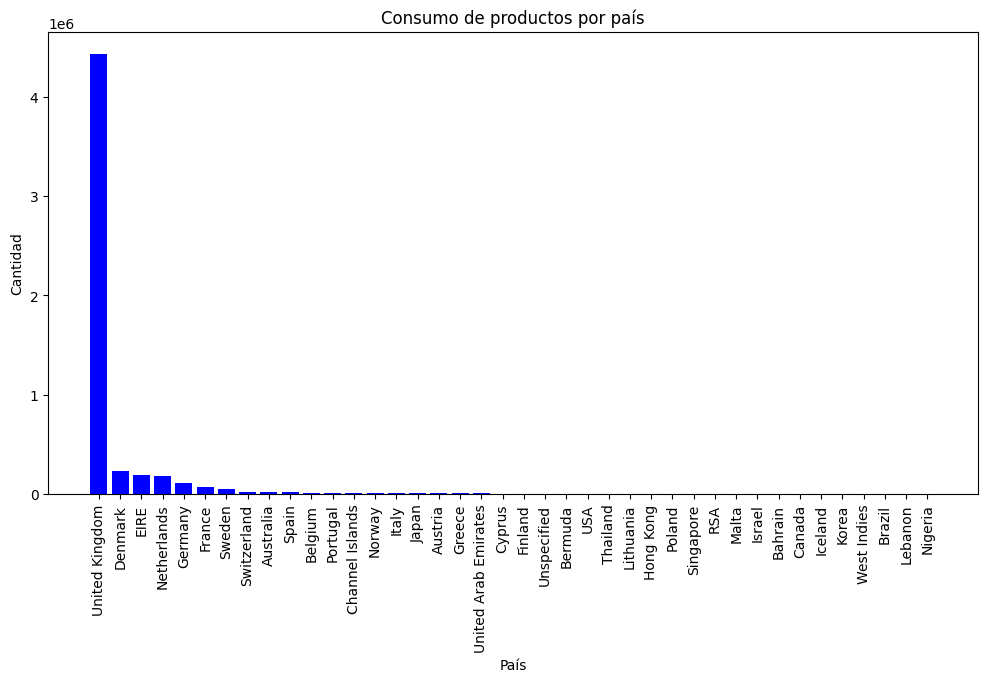

In [14]:
# Análisis 1: Determinar el país que más productos consume

# Agrupar datos por país y sumar la cantidad
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  # Establecer el tamaño de la figura
plt.bar(country_sales.index, country_sales.values, color='blue')

# Añadir etiquetas y título
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.title('Consumo de productos por país')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejorar la legibilidad

# Mostrar el gráfico
plt.show()

Description
WHITE HANGING HEART T-LIGHT HOLDER    57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54698
BROCADE RING PURSE                    47647
PACK OF 72 RETRO SPOT CAKE CASES      46106
ASSORTED COLOUR BIRD ORNAMENT         44925
Name: Quantity, dtype: int64


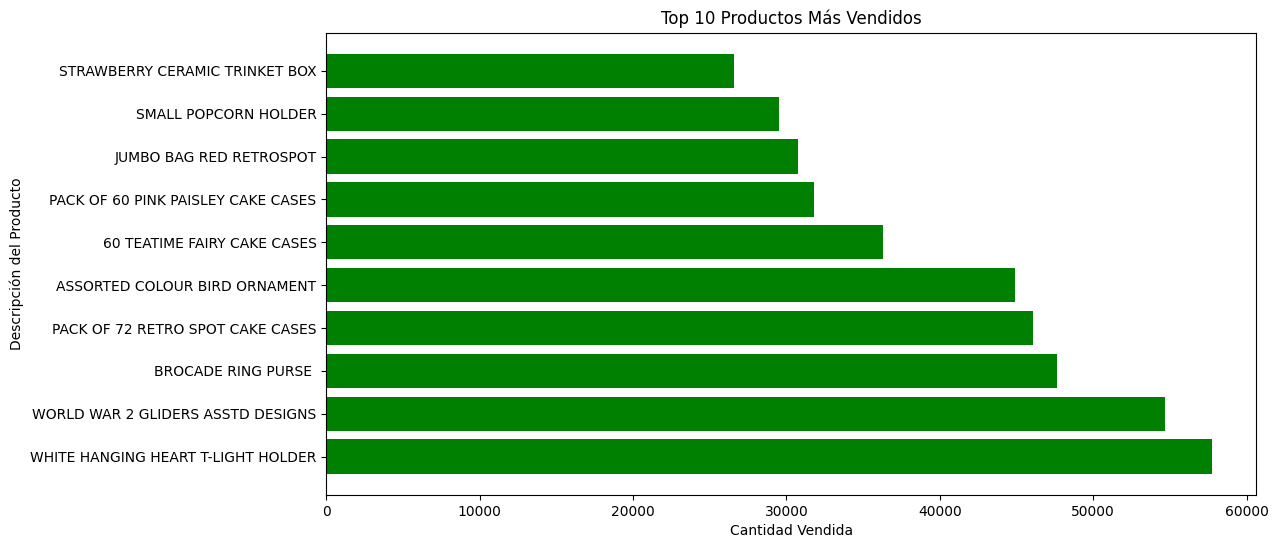

In [15]:
# Análisis 2: Identificar los productos más vendidos o más populares
# Agrupar datos por descripción del producto y sumar la cantidad
product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Mostrar los productos más vendidos
print(product_sales.head())

# Visualizar datos con Matplotlib
plt.figure(figsize=(12, 6))  # Establecer el tamaño de la figura

# Tomar solo los 10 productos más vendidos para la visualización
top_10_products = product_sales.nlargest(10)

plt.barh(top_10_products.index, top_10_products.values, color='green')  # Crear gráfico de barras horizontales

# Añadir etiquetas y título
plt.xlabel('Cantidad Vendida')
plt.ylabel('Descripción del Producto')
plt.title('Top 10 Productos Más Vendidos')

# Mostrar el gráfico
plt.show()


<Axes: xlabel='Month_Year'>

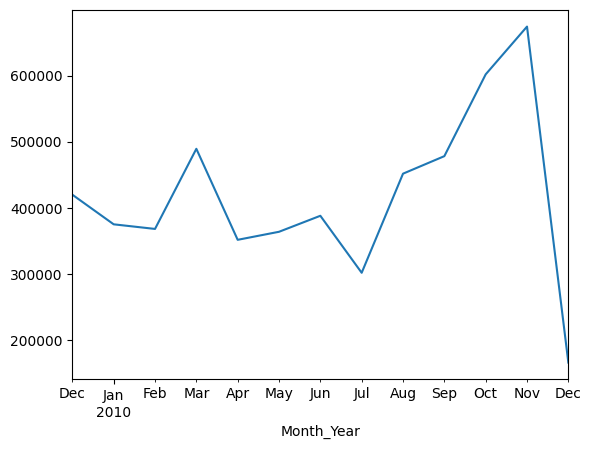

In [11]:
# Análisis 3: Detectar patrones y tendencias
# Convertir la columna de fecha a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extraer el mes y el año
df['Month_Year'] = df['InvoiceDate'].dt.to_period('M')

# Agrupar por mes y sumar la cantidad
monthly_sales = df.groupby('Month_Year')['Quantity'].sum()

# Visualizar las ventas mensuales
monthly_sales.plot()

<Axes: >

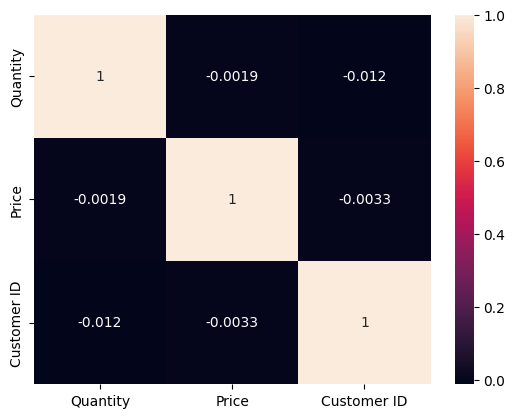

In [13]:
# Análisis 4: Correlación entre variables

# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True)
